<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW/Ch3_%EC%98%88%EC%A0%9C_12_Softmax_Classification_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter3-4. Deep Learning 기초 : Softmax Classification

>## [예제3-12] Softmax Classification (Python)

>### Load modules

In [34]:
import numpy as np
import matplotlib.pyplot as plt

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.17.4
Matplotlib Version :3.1.1


> ### Input and Label

In [0]:
x_input = np.array([  [1, 1],  [2, 2.5], [2.5, 1.3], [4.3, 9.5], [5.5, 7.0], [6, 8.2],   [7, 5],     [8, 6],   [9, 4.5] ], dtype=np.float)
if 0:
  labels = np.array([ [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0],  [0, 1, 0],  [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1] ], dtype=np.float)
else:
  labels_tmp = np.array( [0, 0, 0, 1, 1, 1, 2, 2, 2] )  # 실제 마지막에 np.argmax( ? )의 결과로 나와야 하는 것들이 이렇게 배열로 주어졌다면?
  labels = np.eye(3)[labels_tmp]  # one-hot encoding의 형태로 만들어줌!

#print(x_input)
#print(x_input.reshape(-1, 1))


>### Activation Function : Softmax Function
>$S(y_{i}) = \frac{e^{y_{i}}}{\sum_{j=0}^{m-1}e^{y_{j}}}$

In [0]:
def Softmax(z: np.ndarray)->np.ndarray: # 위의 수식인 거
    c = np.max(z, axis=1) # 한 행에서의 최대값
    c = c.reshape((-1, 1))# n행 1열로 만들어줌!!
                          # 그리고 바로 밑의 행에서 z - c를 해줄 때, z의 사이즈와 shape에 맞추어 스트레치될 것임!! ( n행 3열로! )

    exp_z = np.exp(z - c) # np.exp(0) = 1.0 - 지수가 커지게 되면, 그 값이 exponentially 증가할 수 있음.
                          # 그래서 최대값으로 빼주고, e^0을 해줌으로써 1로 만들어주는 것! 즉, Overflow의 가능성을 확 줄여주기 위함!

    sum_exp_z = np.sum(exp_z, axis=1)
    sum_exp_z = sum_exp_z.reshape((-1, 1))
    y = exp_z / sum_exp_z
    return y

>## Hypothesis
>## $H(X) = S(XW+B)$

In [0]:
n_var = 2
n_class = 3

w = np.random.normal(size=(n_var, n_class))
b = np.random.normal(size=(n_class,))

def Hypothesis(x: np.ndarray) -> np.ndarray:
    logits = np.matmul(x, w) + b
    return Softmax(logits)

>## Cost Function : Cross Entropy Error
>## $cost(W,b) = -\sum_{i=1}^{m}p_{i}\log_{2}q_{i}$

In [0]:
def Cost(x: np.ndarray, t: np.ndarray):  # Cross Entropy Error : 이전의 logistic regression(0이냐 1이냐 classify)와 다르게...
                                         #                      ?
    return np.mean(-np.sum(t * np.log(Hypothesis(x))))


>### Gradient
>### $\frac{d}{dx}f(x) = \lim_{\delta = 0} \frac{f(x+\delta) - f(x-\delta)}{2\delta}$

In [39]:
# 기울기(Gradient) : 수치 미분
print(w.shape[0])

def Gradient(x: int or np.ndarray, t: int or np.ndarray)->tuple:
    global w, b
    pres_w = w.copy()
    grad_w = np.zeros_like(w)
    delta = 1e-7
    for idx_r in range(w.shape[0]):
        for idx_c in range(w.shape[1]):
            w[idx_r, idx_c] = pres_w[idx_r, idx_c] + delta
            cost_p = Cost(x, t)
            w[idx_r, idx_c] = pres_w[idx_r, idx_c] - delta
            cost_m = Cost(x, t)
            grad_w[idx_r, idx_c] = (cost_p-cost_m)/(2*delta)
            w[idx_r, idx_c] = pres_w[idx_r, idx_c]

    pres_b = b.copy()
    grad_b = np.zeros_like(b)
    for idx in range(b.size):
        b[idx] = pres_b[idx] + delta
        cost_p = Cost(x, t)
        b[idx] = pres_b[idx] - delta
        cost_m = Cost(x, t)
        grad_b[idx] = (cost_p-cost_m)/(2*delta)
        b[idx] = pres_b[idx]

    return grad_w, grad_b

2


>## Training 준비

In [40]:
N_training = 1000000
training_idx = np.arange(0, N_training+1, 1)
cost_graph = np.zeros(N_training+1)

cost_graph[0] = Cost(x_input, labels)
print("[{:>5}] cost = {:>10.4}".format(0, cost_graph[0]))

[    0] cost =      28.56


>## Training

In [41]:
# 학습 (Training)
learning_rate = 0.01
for cnt_training in range(1, N_training+1):
    cost_graph[cnt_training] = Cost(x_input, labels)
    grad_w, grad_b = Gradient(x_input, labels)
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b
    if cnt_training % 1000 == 0:
        print("[{:>5}] cost = {:>10.4}".format(cnt_training, cost_graph[cnt_training]))


[ 1000] cost =     0.3152
[ 2000] cost =     0.1566
[ 3000] cost =     0.1047
[ 4000] cost =    0.07876
[ 5000] cost =    0.06322
[ 6000] cost =    0.05284
[ 7000] cost =    0.04542
[ 8000] cost =    0.03984
[ 9000] cost =    0.03549
[10000] cost =    0.03201
[0 0 0 1 1 1 2 2 2]


>## Plotting

[0 0 0 1 1 1 2 2 2]


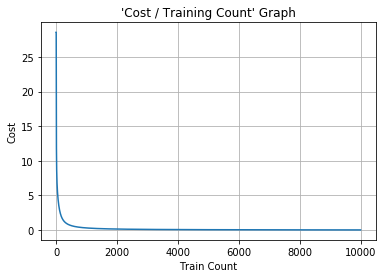

[0]
[1]
[2]


In [45]:
print(np.argmax(Hypothesis(x_input), axis=1))


# Training 상황에 대한 그래프 출력
# 1)Training 회수 별 Cost 값
fig_cost, ax_cost = plt.subplots()
ax_cost.plot(training_idx, cost_graph)
ax_cost.set_title("'Cost / Training Count' Graph")
ax_cost.set_xlabel("Train Count")
ax_cost.set_ylabel("Cost")
ax_cost.grid(True)

plt.show()

# 학습 잘 되었는지 볼까?
print(np.argmax(Hypothesis([[0.1, 3.1]]), axis=1))
print(np.argmax(Hypothesis([[4.7, 10.0]]), axis=1))
print(np.argmax(Hypothesis([[9, 3.1]]), axis=1))